In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt

In [2]:
(X_train , y_train), (X_test , y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 91s 1us/step


In [4]:
X_train.shape


(50000, 32, 32, 3)

In [5]:
y_train.shape
X_test.shape
y_test.shape

(10000, 1)

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
y_test[0]
y_train
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
y_train.reshape(-1)
y_test.reshape(-1)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [22]:
def plot_samples(X , y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[int(y[index])])

C:\Windows\Temp\ipykernel_1588\178866588.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


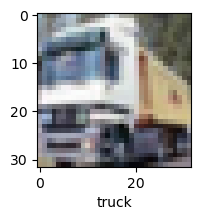

In [23]:
 plot_samples(X_train, y_train , 1)

C:\Windows\Temp\ipykernel_1588\178866588.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


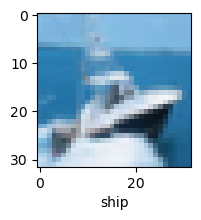

In [24]:
plot_samples(X_train , y_train , 8)

In [25]:
X_train = X_train/255
y_train = y_train/255

In [33]:
ann = models.Sequential([layers.Flatten(input_shape =(32,32,3)),
                        layers.Dense(3000,activation = 'relu'),
                        layers.Dense(1000,activation = 'relu'),
                        layers.Dense(10,activation = 'softmax')])

In [34]:
ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])
ann.fit(X_train, y_train ,epochs = 4)

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 76ms/step - accuracy: 0.1002 - loss: 0.0184
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 76ms/step - accuracy: 0.1009 - loss: 3.5873e-04
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 73ms/step - accuracy: 0.1007 - loss: 2.2365e-04
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.1018 - loss: 1.6858e-04


In [35]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(elements) for elements in y_pred] 
print('classification report : ' , classification_report(y_test , y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
classification report :                precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32 , kernel_size = (3,3) , activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu' ),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(300 , activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [40]:
cnn.compile(loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'], optimizer = 'adam')

In [ ]:
cnn.fit(X_train, y_train , epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 47ms/step - accuracy: 0.0989 - loss: 0.0144
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.0996 - loss: 1.9070e-09
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.0985 - loss: 7.6665e-11
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 42ms/step - accuracy: 0.0991 - loss: 3.3420e-10
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.0987 - loss: 9.4710e-10
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.1011 - loss: 4.2568e-10
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.0998 - loss: 2.6181e-10
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.1001 - loss: 2.4441e-12
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.0998 - loss: 3.9235e-10
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 163s 104ms/step - accuracy: 0.0996 - loss: 1.0959e-10
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - a